In [2]:
import pandas as pd 
from pandas import Series
import numpy as np
import gc

import matplotlib.pyplot as plt


files = { 'Adipose_Subcutaneous' : 'data/Adipose_Subcutaneous.v8.normalized_expression.bed',
'Adipose_Visceral_Omentum' : 'data/Adipose_Visceral_Omentum.v8.normalized_expression.bed',
'Adrenal_Gland' : 'data/Adrenal_Gland.v8.normalized_expression.bed',
'Artery_Aorta' : 'data/Artery_Aorta.v8.normalized_expression.bed',
'Artery_Coronary' : 'data/Artery_Coronary.v8.normalized_expression.bed',
'Artery_Tibial' : 'data/Artery_Tibial.v8.normalized_expression.bed',
'Brain_Amygdala' : 'data/Brain_Amygdala.v8.normalized_expression.bed',
'Brain_Anterior_cingulate' : 'data/Brain_Anterior_cingulate_cortex_BA24.v8.normalized_expression.bed',
'Brain_Caudate' : 'data/Brain_Caudate_basal_ganglia.v8.normalized_expression.bed',
'Brain_Cerebellar' : 'data/Brain_Cerebellar_Hemisphere.v8.normalized_expression.bed',
'Brain_Cerebellum' : 'data/Brain_Cerebellum.v8.normalized_expression.bed',
'Brain_Cortex' : 'data/Brain_Cortex.v8.normalized_expression.bed',
'Brain_Frontal_Cortex' : 'data/Brain_Frontal_Cortex_BA9.v8.normalized_expression.bed',
'Brain_Hippocampus' : 'data/Brain_Hippocampus.v8.normalized_expression.bed',
'Brain_Hypothalamus' : 'data/Brain_Hypothalamus.v8.normalized_expression.bed',
'Brain_Nucleus' : 'data/Brain_Nucleus_accumbens_basal_ganglia.v8.normalized_expression.bed',
'Brain_Putamen' : 'data/Brain_Putamen_basal_ganglia.v8.normalized_expression.bed',
'Brain_Spinal_cord' : 'data/Brain_Spinal_cord_cervical_c-1.v8.normalized_expression.bed',
'Brain_Substantia_nigra' : 'data/Brain_Substantia_nigra.v8.normalized_expression.bed',
'Breast_Mammary_Tissue' : 'data/Breast_Mammary_Tissue.v8.normalized_expression.bed',
'Cells_Cultured' : 'data/Cells_Cultured_fibroblasts.v8.normalized_expression.bed',
'Cells_EBV' : 'data/Cells_EBV-transformed_lymphocytes.v8.normalized_expression.bed',
'Colon_Sigmoid' : 'data/Colon_Sigmoid.v8.normalized_expression.bed',
'Colon_Transverse' : 'data/Colon_Transverse.v8.normalized_expression.bed',
'Esophagus_Gastro' : 'data/Esophagus_Gastroesophageal_Junction.v8.normalized_expression.bed',
'Esophagus_Mucosa' : 'data/Esophagus_Mucosa.v8.normalized_expression.bed',
'Esophagus_Muscularis' : 'data/Esophagus_Muscularis.v8.normalized_expression.bed',
'Heart_Atrial' : 'data/Heart_Atrial_Appendage.v8.normalized_expression.bed',
'Heart_L_Vent' : 'data/Heart_Left_Ventricle.v8.normalized_expression.bed',
'Kidney_Cortex' : 'data/Kidney_Cortex.v8.normalized_expression.bed',
'Liver' : 'data/Liver.v8.normalized_expression.bed',
'Lung' : 'data/Lung.v8.normalized_expression.bed',
'Minor_Salivary' : 'data/Minor_Salivary_Gland.v8.normalized_expression.bed',
'Muscle_Skeletal' : 'data/Muscle_Skeletal.v8.normalized_expression.bed',
'Nerve_Tibial' : 'data/Nerve_Tibial.v8.normalized_expression.bed',
'Ovary' : 'data/Ovary.v8.normalized_expression.bed',
'Pancreas' : 'data/Pancreas.v8.normalized_expression.bed',
'Pituitary' : 'data/Pituitary.v8.normalized_expression.bed',
'Prostate' : 'data/Prostate.v8.normalized_expression.bed',
'Skin_Not_Sun_Epsd' : 'data/Skin_Not_Sun_Exposed_Suprapubic.v8.normalized_expression.bed',
'Skin_Sun_Epsd' : 'data/Skin_Sun_Exposed_Lower_leg.v8.normalized_expression.bed',
'Small_Intestine' : 'data/Small_Intestine_Terminal_Ileum.v8.normalized_expression.bed',
'Spleen' : 'data/Spleen.v8.normalized_expression.bed',
'Stomach' : 'data/Stomach.v8.normalized_expression.bed',
'Testis' : 'data/Testis.v8.normalized_expression.bed',
'Thyroid' : 'data/Thyroid.v8.normalized_expression.bed',
'Uterus' : 'data/Uterus.v8.normalized_expression.bed',
'Vagina' : 'data/Vagina.v8.normalized_expression.bed',
'Whole_Blood' : 'data/Whole_Blood.v8.normalized_expression.bed'}

# General View with all genes/people
## General number of people and genes in each tissue

In [34]:
print("Total number of tissues: " + str(len(files)))

Total number of tissues: 49


In [22]:
genes = []
people = []

for f in sorted(files.items()):
    print("\n#############################")
    print("## " + f[0])
    t = pd.read_csv(f[1], sep="\t").drop(columns=["#chr", "start", "end"]).set_index("gene_id")
    people.extend(t.columns.values)
    print(str(len(t.columns.values)) + " people")
    t = t.transpose()
    genes.extend(t.columns.values)
    print(str(len(t.columns.values)) + " genes")


#############################
## Adipose_Subcutaneous
581 people
24665 genes

#############################
## Adipose_Visceral_Omentum
469 people
24724 genes

#############################
## Adrenal_Gland
233 people
23820 genes

#############################
## Artery_Aorta
387 people
23959 genes

#############################
## Artery_Coronary
213 people
24529 genes

#############################
## Artery_Tibial
584 people
23304 genes

#############################
## Brain_Amygdala
129 people
24069 genes

#############################
## Brain_Anterior_cingulate
147 people
24342 genes

#############################
## Brain_Caudate
194 people
24718 genes

#############################
## Brain_Cerebellar
175 people
25144 genes

#############################
## Brain_Cerebellum
209 people
25461 genes

#############################
## Brain_Cortex
205 people
24849 genes

#############################
## Brain_Frontal_Cortex
175 people
24676 genes

#############################
## 

# Unique people and genes

In [28]:
unique_people, counts_people = np.unique(people, return_counts=True)
unique_genes,   counts_genes = np.unique(genes, return_counts=True)

In [30]:
print("Number of unique people across all tissues:\t" + str(len(unique_people)))
print("Number of unique genes across all tissues:\t" + str(len(unique_genes)))

Number of unique people across all tissues:	838
Number of unique genes across all tissues:	39832


# Representation of people/genes across number of tissues

In [37]:
# There is no single person with samples from all the tissues
print("Maximum number of tissues collected from a person: " + str(np.max(counts_people)))

Maximum number of tissues collected from a person: 39


People with sample from only 1 tissue: 4
People with samples from 39 tissues: 1


Text(0,0.5,'Number of people with a certain number of tissues collected')

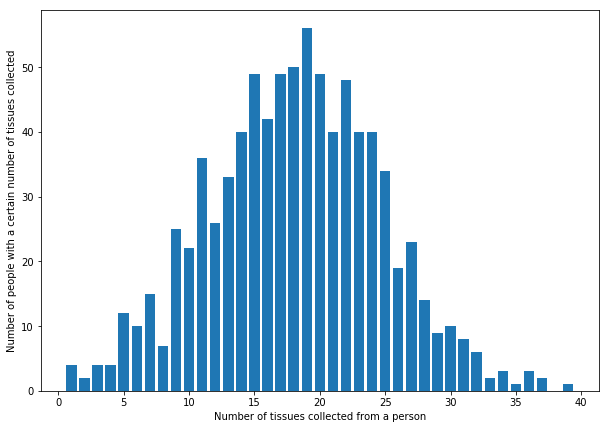

In [49]:
blocks = []
for i in range(1,40):
    blocks.append(len(np.where(counts_people == i)[0]))

print("People with sample from only 1 tissue: " + str(len(np.where(counts_people == 1)[0])))
print("People with samples from 39 tissues: " + str(len(np.where(counts_people == 39)[0])))

plt.figure(figsize=(10,7))
plt.bar(range(1,40), blocks)
plt.xlabel("Number of tissues collected from a person")
plt.ylabel("Number of people with a certain number of tissues collected")

Genes present in only 1 tissue: 5368
Genes present in all 49 tissues: 15636


Text(0,0.5,'Number of genes present in a certain number of tissues')

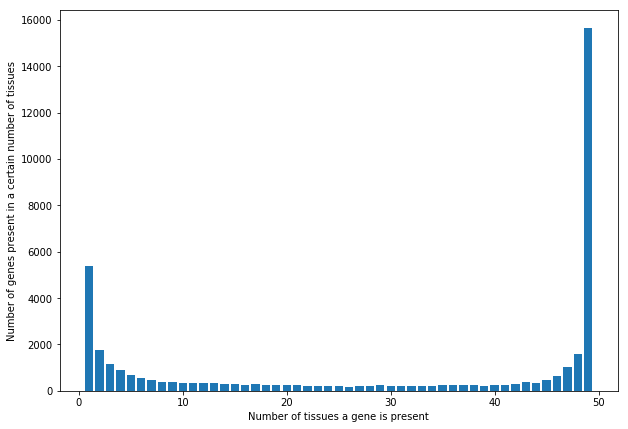

In [54]:
blocks = []
for i in range(1,50):
    blocks.append(len(np.where(counts_genes == i)[0]))

print("Genes present in only 1 tissue: " + str(len(np.where(counts_genes == 1)[0])))
print("Genes present in all 49 tissues: " + str(len(np.where(counts_genes == 49)[0])))

plt.figure(figsize=(10,7))
plt.bar(range(1,50), blocks)
plt.xlabel("Number of tissues a gene is present")
plt.ylabel("Number of genes present in a certain number of tissues")

# General View now only with protein-encoding genes
## General number of people and genes in each tissue

In [2]:
genes = []

for f in sorted(files.items()):
    print("\n#############################")
    print("## " + f[0])
    t = pd.read_csv(f[1], sep="\t").drop(columns=["#chr", "start", "end"]).set_index("gene_id")
    t = t.transpose()
    
    filtered_df = pd.read_pickle("data_filtered/" + f[0] + ".pkl")
    genes.extend(filtered_df.columns.values)
    
    print("Change: " + str(len(t.columns.values)) + " --> " + str(len(filtered_df.columns.values)))


#############################
## Adipose_Subcutaneous
Change: 24665 --> 16273

#############################
## Adipose_Visceral_Omentum
Change: 24724 --> 16346

#############################
## Adrenal_Gland
Change: 23820 --> 16080

#############################
## Artery_Aorta
Change: 23959 --> 16104

#############################
## Artery_Coronary
Change: 24529 --> 16325

#############################
## Artery_Tibial
Change: 23304 --> 15919

#############################
## Brain_Amygdala
Change: 24069 --> 16414

#############################
## Brain_Anterior_cingulate
Change: 24342 --> 16409

#############################
## Brain_Caudate
Change: 24718 --> 16474

#############################
## Brain_Cerebellar
Change: 25144 --> 16346

#############################
## Brain_Cerebellum
Change: 25461 --> 16463

#############################
## Brain_Cortex
Change: 24849 --> 16536

#############################
## Brain_Frontal_Cortex
Change: 24676 --> 16492

####################

# Unique genes

In [3]:
unique_genes, counts_genes = np.unique(genes, return_counts=True)

In [4]:
print("Number of unique genes across all tissues:\t" + str(len(unique_genes)))

Number of unique genes across all tissues:	18767


# Representation of genes across number of tissues

Genes present in only 1 tissue: 467
Genes present in all 49 tissues: 12708


Text(0,0.5,'Number of genes present in a certain number of tissues')

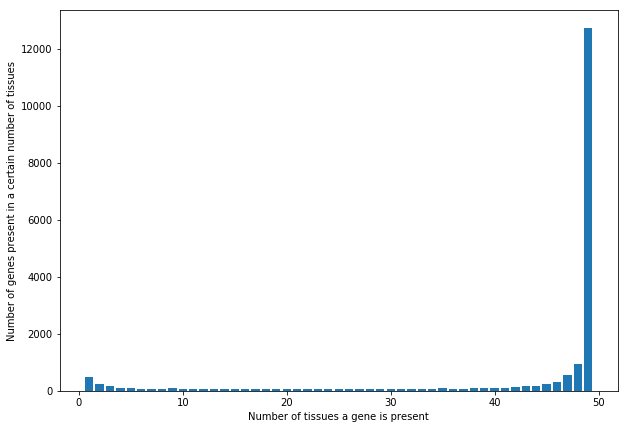

In [5]:
blocks = []
for i in range(1,50):
    blocks.append(len(np.where(counts_genes == i)[0]))

print("Genes present in only 1 tissue: " + str(len(np.where(counts_genes == 1)[0])))
print("Genes present in all 49 tissues: " + str(len(np.where(counts_genes == 49)[0])))

plt.figure(figsize=(10,7))
plt.bar(range(1,50), blocks)
plt.xlabel("Number of tissues a gene is present")
plt.ylabel("Number of genes present in a certain number of tissues")

# General View after conversion to gene IDs

## Number of genes not translated

In [12]:
for f in sorted(files.items()):
    print("### - " + f[0])
    tmp = pd.read_pickle("data_filtered/geneids_"+f[0]+".pkl")
    tmp2 = tmp.filter(like="ENSG", axis=1)
    print("Columns without translation: " + str(len(tmp2.columns.values)))
    print()

### - Adipose_Subcutaneous
Columns without translation: 235

### - Adipose_Visceral_Omentum
Columns without translation: 245

### - Adrenal_Gland
Columns without translation: 237

### - Artery_Aorta
Columns without translation: 229

### - Artery_Coronary
Columns without translation: 241

### - Artery_Tibial
Columns without translation: 225

### - Brain_Amygdala
Columns without translation: 242

### - Brain_Anterior_cingulate
Columns without translation: 242

### - Brain_Caudate
Columns without translation: 247

### - Brain_Cerebellar
Columns without translation: 258

### - Brain_Cerebellum
Columns without translation: 259

### - Brain_Cortex
Columns without translation: 246

### - Brain_Frontal_Cortex
Columns without translation: 247

### - Brain_Hippocampus
Columns without translation: 245

### - Brain_Hypothalamus
Columns without translation: 253

### - Brain_Nucleus
Columns without translation: 252

### - Brain_Putamen
Columns without translation: 238

### - Brain_Spinal_cord
Column

In [6]:
genes = []

for f in sorted(files.items()):    
    filtered_df = pd.read_pickle("data_filtered/geneids_" + f[0] + ".pkl")
    genes.extend(filtered_df.columns.values)
    
unique_genes, counts_genes = np.unique(genes, return_counts=True)
print("Number of unique genes across all tissues:\t" + str(len(unique_genes)))

Number of unique genes across all tissues:	18765


Genes present in only 1 tissue: 467
Genes present in all 49 tissues: 12706


Text(0,0.5,'Number of genes present in a certain number of tissues')

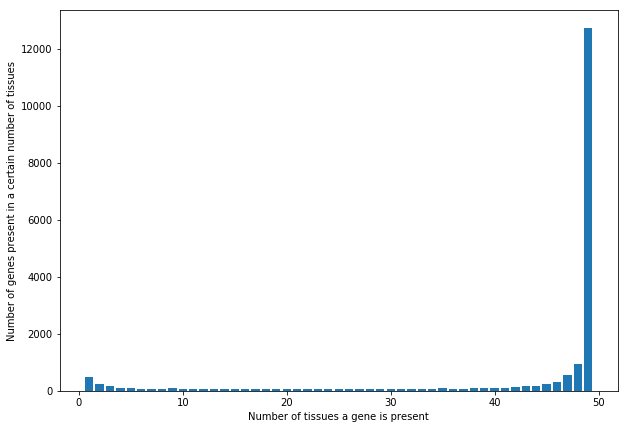

In [7]:
blocks = []
for i in range(1,50):
    blocks.append(len(np.where(counts_genes == i)[0]))

print("Genes present in only 1 tissue: " + str(len(np.where(counts_genes == 1)[0])))
print("Genes present in all 49 tissues: " + str(len(np.where(counts_genes == 49)[0])))

plt.figure(figsize=(10,7))
plt.bar(range(1,50), blocks)
plt.xlabel("Number of tissues a gene is present")
plt.ylabel("Number of genes present in a certain number of tissues")

# Final statistics without genes unmatched

In [3]:
genes = []

for f in sorted(files.items()):    
    filtered_df = pd.read_pickle("data_filtered/only_geneids_" + f[0] + ".pkl")
    genes.extend(filtered_df.columns.values)
    
unique_genes, counts_genes = np.unique(genes, return_counts=True)
print("Number of unique genes across all tissues:\t" + str(len(unique_genes)))

Number of unique genes across all tissues:	18364


Genes present in only 1 tissue: 412
Genes present in all 49 tissues: 12557


Text(0,0.5,'Number of genes present in a certain number of tissues')

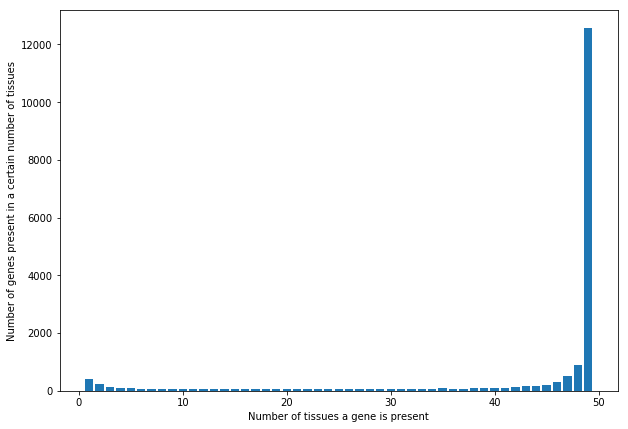

In [4]:
blocks = []
for i in range(1,50):
    blocks.append(len(np.where(counts_genes == i)[0]))

print("Genes present in only 1 tissue: " + str(len(np.where(counts_genes == 1)[0])))
print("Genes present in all 49 tissues: " + str(len(np.where(counts_genes == 49)[0])))

plt.figure(figsize=(10,7))
plt.bar(range(1,50), blocks)
plt.xlabel("Number of tissues a gene is present")
plt.ylabel("Number of genes present in a certain number of tissues")